In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [2]:
#seed set
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
df_pre = pd.read_csv("C:/sourceTree/DataScience/ICT/Py_Project/20201208-day37/data-02-stock_daily.csv", header=1)#header:헤더로 설정할 행의 번호. 원본을 편집않도록 도와주는 고마운 존재!
df_pre

,Open,High,Low,Volume,Close
0,828.659973,833.450012,828.349976,1247700,831.659973
1,823.020020,828.070007,821.655029,1597800,828.070007
2,819.929993,824.400024,818.979980,1281700,824.159973
3,819.359985,823.000000,818.469971,1304000,818.979980
4,819.000000,823.000000,816.000000,1053600,820.450012
...,...,...,...,...,...
727,599.992707,604.832763,562.192568,147100,567.002574
728,558.712504,568.452595,558.712504,7900,567.162558
729,566.892592,567.002574,556.932537,10800,556.972503
730,561.202549,566.432590,558.672539,41200,559.992565


In [4]:
df = df_pre.sample(frac=1) 
dataset= df_pre.values


#데이터 정규화
from sklearn.preprocessing import StandardScaler
xdata=dataset
xdata_ss = StandardScaler().fit_transform(xdata)
print(xdata_ss)


X = dataset[:,0:4]
Y = dataset[:,4]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=seed)

In [8]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1)) 

In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
#학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience=50)
#monitor = 'val_loss' :val_loss의 값을 기준으로 해서 멈춤여부를 정하겠어.(횟수는 patience에서 설정)
# patience=100 : 100번까지는 오차가 줄지 않아도 봐줄게. 하지만 101번 째에도 오차가 안줄면 학습을 멈출거야!

#모델 저장 조건 설정.
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR) :
    os.mkdir(MODEL_DIR)

#모델 저장조건 설정
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5" #파일저장경로 & 저장형식까지 설정.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True) 

#모델 실행
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=500, batch_size=10,
                    callbacks=[early_stopping_callback, checkpointer]) 

Epoch 1/500
 1/35 [..............................] - ETA: 0s - loss: 8632213504.0000
Epoch 00001: val_loss improved from inf to 256614528.00000, saving model to ./model\01-256614528.0000.hdf5
35/35 [==============================] - 0s 4ms/step - loss: 2976521216.0000 - val_loss: 256614528.0000
Epoch 2/500
 1/35 [..............................] - ETA: 0s - loss: 880865664.0000
Epoch 00002: val_loss improved from 256614528.00000 to 7095293.50000, saving model to ./model\02-7095293.5000.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 75652088.0000 - val_loss: 7095293.5000
Epoch 3/500
 1/35 [..............................] - ETA: 0s - loss: 13601458.0000
Epoch 00003: val_loss improved from 7095293.50000 to 154308.20312, saving model to ./model\03-154308.2031.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 1313920.1250 - val_loss: 154308.2031
Epoch 4/500
 1/35 [..............................] - ETA: 0s - loss: 134589.4062
Epoch 00004: val_loss did not im

Epoch 34/500
 1/35 [..............................] - ETA: 0s - loss: 145563.9531
Epoch 00034: val_loss did not improve from 145014.31250
35/35 [==============================] - 0s 1ms/step - loss: 166762.5469 - val_loss: 177572.7031
Epoch 35/500
 1/35 [..............................] - ETA: 0s - loss: 217828.6719
Epoch 00035: val_loss improved from 145014.31250 to 141931.29688, saving model to ./model\35-141931.2969.hdf5
35/35 [==============================] - 0s 1ms/step - loss: 169741.5000 - val_loss: 141931.2969
Epoch 36/500
 1/35 [..............................] - ETA: 0s - loss: 1042496.1250
Epoch 00036: val_loss improved from 141931.29688 to 141211.81250, saving model to ./model\36-141211.8125.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 182596.8281 - val_loss: 141211.8125
Epoch 37/500
 1/35 [..............................] - ETA: 0s - loss: 78444.7734
Epoch 00037: val_loss did not improve from 141211.81250
35/35 [==============================] - 0s 1ms/s

Epoch 00067: val_loss did not improve from 130865.95312
35/35 [==============================] - 0s 1ms/step - loss: 167323.8906 - val_loss: 168676.3281
Epoch 68/500
 1/35 [..............................] - ETA: 0s - loss: 167335.1562
Epoch 00068: val_loss did not improve from 130865.95312
35/35 [==============================] - 0s 1ms/step - loss: 154218.7812 - val_loss: 182170.0938
Epoch 69/500
 1/35 [..............................] - ETA: 0s - loss: 218507.8438
Epoch 00069: val_loss did not improve from 130865.95312
35/35 [==============================] - 0s 1ms/step - loss: 196126.3906 - val_loss: 226712.2656
Epoch 70/500
 1/35 [..............................] - ETA: 0s - loss: 74026.1719
Epoch 00070: val_loss did not improve from 130865.95312
35/35 [==============================] - 0s 1ms/step - loss: 215745.3281 - val_loss: 199282.0781
Epoch 71/500
 1/35 [..............................] - ETA: 0s - loss: 173460.9531
Epoch 00071: val_loss did not improve from 130865.95312
35/35

Epoch 101/500
 1/35 [..............................] - ETA: 0s - loss: 97872.9375
Epoch 00101: val_loss did not improve from 101356.01562
35/35 [==============================] - 0s 1ms/step - loss: 189215.7656 - val_loss: 124295.4531
Epoch 102/500
 1/35 [..............................] - ETA: 0s - loss: 85229.1719
Epoch 00102: val_loss did not improve from 101356.01562
35/35 [==============================] - 0s 1ms/step - loss: 162755.2031 - val_loss: 111031.0078
Epoch 103/500
 1/35 [..............................] - ETA: 0s - loss: 90860.1016
Epoch 00103: val_loss did not improve from 101356.01562
35/35 [==============================] - 0s 1ms/step - loss: 235400.9844 - val_loss: 485825.2812
Epoch 104/500
 1/35 [..............................] - ETA: 0s - loss: 706781.5000
Epoch 00104: val_loss did not improve from 101356.01562
35/35 [==============================] - 0s 1ms/step - loss: 369894.0938 - val_loss: 120662.3906
Epoch 105/500
 1/35 [..............................] - ETA:

Epoch 135/500
 1/35 [..............................] - ETA: 0s - loss: 393323.9062
Epoch 00135: val_loss did not improve from 64599.82812
35/35 [==============================] - 0s 1ms/step - loss: 256823.1562 - val_loss: 179553.6250
Epoch 136/500
 1/35 [..............................] - ETA: 0s - loss: 123147.1719
Epoch 00136: val_loss did not improve from 64599.82812
35/35 [==============================] - 0s 1ms/step - loss: 421375.2188 - val_loss: 81630.0312
Epoch 137/500
 1/35 [..............................] - ETA: 0s - loss: 38383.4648
Epoch 00137: val_loss did not improve from 64599.82812
35/35 [==============================] - 0s 1ms/step - loss: 153086.9219 - val_loss: 124639.6328
Epoch 138/500
 1/35 [..............................] - ETA: 0s - loss: 99398.8359
Epoch 00138: val_loss did not improve from 64599.82812
35/35 [==============================] - 0s 1ms/step - loss: 267921.3750 - val_loss: 627801.0625
Epoch 139/500
 1/35 [..............................] - ETA: 0s 

 1/35 [..............................] - ETA: 0s - loss: 80772.2344
Epoch 00169: val_loss did not improve from 40222.06641
35/35 [==============================] - 0s 1ms/step - loss: 73508.3359 - val_loss: 54800.4727
Epoch 170/500
 1/35 [..............................] - ETA: 0s - loss: 82394.9844
Epoch 00170: val_loss did not improve from 40222.06641
35/35 [==============================] - 0s 1ms/step - loss: 85320.8984 - val_loss: 101994.0859
Epoch 171/500
 1/35 [..............................] - ETA: 0s - loss: 40614.3008
Epoch 00171: val_loss improved from 40222.06641 to 35130.65234, saving model to ./model\171-35130.6523.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 191211.5000 - val_loss: 35130.6523
Epoch 172/500
 1/35 [..............................] - ETA: 0s - loss: 29371.3027
Epoch 00172: val_loss did not improve from 35130.65234
35/35 [==============================] - 0s 1ms/step - loss: 2033406.5000 - val_loss: 4265168.5000
Epoch 173/500
 1/35 [......

Epoch 00202: val_loss did not improve from 26435.17969
35/35 [==============================] - 0s 1ms/step - loss: 34056.0703 - val_loss: 47792.6836
Epoch 203/500
 1/35 [..............................] - ETA: 0s - loss: 44087.2656
Epoch 00203: val_loss did not improve from 26435.17969
35/35 [==============================] - 0s 1ms/step - loss: 36407.2930 - val_loss: 26534.0449
Epoch 204/500
 1/35 [..............................] - ETA: 0s - loss: 23867.1445
Epoch 00204: val_loss did not improve from 26435.17969
35/35 [==============================] - 0s 1ms/step - loss: 59001.6484 - val_loss: 136467.0000
Epoch 205/500
 1/35 [..............................] - ETA: 0s - loss: 124831.3594
Epoch 00205: val_loss did not improve from 26435.17969
35/35 [==============================] - 0s 1ms/step - loss: 39726.8555 - val_loss: 38215.5469
Epoch 206/500
 1/35 [..............................] - ETA: 0s - loss: 35566.5898
Epoch 00206: val_loss did not improve from 26435.17969
35/35 [========

Epoch 236/500
 1/35 [..............................] - ETA: 0s - loss: 7814.2510
Epoch 00236: val_loss did not improve from 15109.94336
35/35 [==============================] - 0s 1ms/step - loss: 26726.7266 - val_loss: 49496.4609
Epoch 237/500
 1/35 [..............................] - ETA: 0s - loss: 17291.6133
Epoch 00237: val_loss did not improve from 15109.94336
35/35 [==============================] - 0s 1ms/step - loss: 104501.0625 - val_loss: 65990.1094
Epoch 238/500
 1/35 [..............................] - ETA: 0s - loss: 64699.5000
Epoch 00238: val_loss did not improve from 15109.94336
35/35 [==============================] - 0s 1ms/step - loss: 52519.6797 - val_loss: 16636.4766
Epoch 239/500
 1/35 [..............................] - ETA: 0s - loss: 6888.9673
Epoch 00239: val_loss did not improve from 15109.94336
35/35 [==============================] - 0s 1ms/step - loss: 38032.8086 - val_loss: 40546.9648
Epoch 240/500
 1/35 [..............................] - ETA: 0s - loss: 96

 1/35 [..............................] - ETA: 0s - loss: 62402.4492
Epoch 00270: val_loss did not improve from 7096.93115
35/35 [==============================] - 0s 1ms/step - loss: 176958.4375 - val_loss: 16311.9736
Epoch 271/500
 1/35 [..............................] - ETA: 0s - loss: 19323.7148
Epoch 00271: val_loss did not improve from 7096.93115
35/35 [==============================] - 0s 1ms/step - loss: 866582.3125 - val_loss: 565170.3750
Epoch 272/500
 1/35 [..............................] - ETA: 0s - loss: 929112.1250
Epoch 00272: val_loss did not improve from 7096.93115
35/35 [==============================] - 0s 1ms/step - loss: 12382683.0000 - val_loss: 3330776.5000
Epoch 273/500
 1/35 [..............................] - ETA: 0s - loss: 2014920.7500
Epoch 00273: val_loss did not improve from 7096.93115
35/35 [==============================] - 0s 1ms/step - loss: 737069.9375 - val_loss: 43410.9883
Epoch 274/500
 1/35 [..............................] - ETA: 0s - loss: 48480.6

Epoch 305/500
 1/35 [..............................] - ETA: 0s - loss: 26345.2031
Epoch 00305: val_loss did not improve from 4263.98926
35/35 [==============================] - 0s 1ms/step - loss: 480986.7812 - val_loss: 466133.1562
Epoch 306/500
 1/35 [..............................] - ETA: 0s - loss: 378774.6562
Epoch 00306: val_loss did not improve from 4263.98926
35/35 [==============================] - 0s 1ms/step - loss: 147900.5781 - val_loss: 16020.2793
Epoch 307/500
 1/35 [..............................] - ETA: 0s - loss: 7564.2280
Epoch 00307: val_loss did not improve from 4263.98926
35/35 [==============================] - 0s 1ms/step - loss: 61495.7656 - val_loss: 336500.9375
Epoch 308/500
 1/35 [..............................] - ETA: 0s - loss: 261127.5312
Epoch 00308: val_loss did not improve from 4263.98926
35/35 [==============================] - 0s 1ms/step - loss: 35907.1211 - val_loss: 6592.8604
Epoch 309/500
 1/35 [..............................] - ETA: 0s - loss: 5

Epoch 340/500
 1/35 [..............................] - ETA: 0s - loss: 2038.1555
Epoch 00340: val_loss improved from 2114.84351 to 2043.27722, saving model to ./model\340-2043.2772.hdf5
35/35 [==============================] - 0s 2ms/step - loss: 5944.0723 - val_loss: 2043.2772
Epoch 341/500
 1/35 [..............................] - ETA: 0s - loss: 394.9783
Epoch 00341: val_loss did not improve from 2043.27722
35/35 [==============================] - 0s 1ms/step - loss: 5615.1719 - val_loss: 3847.9470
Epoch 342/500
 1/35 [..............................] - ETA: 0s - loss: 2250.5093
Epoch 00342: val_loss did not improve from 2043.27722
35/35 [==============================] - 0s 1ms/step - loss: 3704.4773 - val_loss: 2125.8691
Epoch 343/500
 1/35 [..............................] - ETA: 0s - loss: 1720.0748
Epoch 00343: val_loss did not improve from 2043.27722
35/35 [==============================] - 0s 1ms/step - loss: 7910.8887 - val_loss: 2711.3271
Epoch 344/500
 1/35 [.................

 1/35 [..............................] - ETA: 0s - loss: 290.4283
Epoch 00374: val_loss did not improve from 968.04004
35/35 [==============================] - 0s 1ms/step - loss: 2175.1562 - val_loss: 7015.8711
Epoch 375/500
 1/35 [..............................] - ETA: 0s - loss: 22419.9512
Epoch 00375: val_loss did not improve from 968.04004
35/35 [==============================] - 0s 1ms/step - loss: 2229.5266 - val_loss: 1013.2446
Epoch 376/500
 1/35 [..............................] - ETA: 0s - loss: 900.0535
Epoch 00376: val_loss did not improve from 968.04004
35/35 [==============================] - 0s 1ms/step - loss: 11965.0830 - val_loss: 2303.9604
Epoch 377/500
 1/35 [..............................] - ETA: 0s - loss: 2312.4392
Epoch 00377: val_loss did not improve from 968.04004
35/35 [==============================] - 0s 1ms/step - loss: 2855.3015 - val_loss: 2719.7778
Epoch 378/500
 1/35 [..............................] - ETA: 0s - loss: 2562.2383
Epoch 00378: val_loss did

Epoch 410/500
 1/35 [..............................] - ETA: 0s - loss: 1972.8816
Epoch 00410: val_loss did not improve from 968.04004
35/35 [==============================] - 0s 1ms/step - loss: 5855.4028 - val_loss: 1056.9286
Epoch 411/500
 1/35 [..............................] - ETA: 0s - loss: 583.4498
Epoch 00411: val_loss did not improve from 968.04004
35/35 [==============================] - 0s 1ms/step - loss: 5715.4692 - val_loss: 2393.1829
Epoch 412/500
 1/35 [..............................] - ETA: 0s - loss: 196.7455
Epoch 00412: val_loss did not improve from 968.04004
35/35 [==============================] - 0s 1ms/step - loss: 6277.6079 - val_loss: 971.5641
Epoch 413/500
 1/35 [..............................] - ETA: 0s - loss: 1048.4199
Epoch 00413: val_loss did not improve from 968.04004
35/35 [==============================] - 0s 1ms/step - loss: 4484.3501 - val_loss: 1221.4221
Epoch 414/500
 1/35 [..............................] - ETA: 0s - loss: 647.0661
Epoch 00414: va

Epoch 445/500
 1/35 [..............................] - ETA: 0s - loss: 846.7186
Epoch 00445: val_loss did not improve from 17.52905
35/35 [==============================] - 0s 1ms/step - loss: 642.4644 - val_loss: 623.8320
Epoch 446/500
 1/35 [..............................] - ETA: 0s - loss: 787.6451
Epoch 00446: val_loss did not improve from 17.52905
35/35 [==============================] - 0s 1ms/step - loss: 1710.8206 - val_loss: 566.6765
Epoch 447/500
 1/35 [..............................] - ETA: 0s - loss: 511.2237
Epoch 00447: val_loss did not improve from 17.52905
35/35 [==============================] - 0s 1ms/step - loss: 956.3887 - val_loss: 286.3078
Epoch 448/500
 1/35 [..............................] - ETA: 0s - loss: 242.8520
Epoch 00448: val_loss did not improve from 17.52905
35/35 [==============================] - 0s 1ms/step - loss: 636.4158 - val_loss: 53.2276
Epoch 449/500
 1/35 [..............................] - ETA: 0s - loss: 48.1117
Epoch 00449: val_loss did not

 1/35 [..............................] - ETA: 0s - loss: 9536.7168
Epoch 00481: val_loss did not improve from 17.52905
35/35 [==============================] - 0s 1ms/step - loss: 1583.9844 - val_loss: 1301.0798
Epoch 482/500
 1/35 [..............................] - ETA: 0s - loss: 2429.4028
Epoch 00482: val_loss did not improve from 17.52905
35/35 [==============================] - 0s 1ms/step - loss: 1943.9490 - val_loss: 712.5937
Epoch 483/500
 1/35 [..............................] - ETA: 0s - loss: 580.4894
Epoch 00483: val_loss did not improve from 17.52905
35/35 [==============================] - 0s 1ms/step - loss: 2184.2559 - val_loss: 9658.7402
Epoch 484/500
 1/35 [..............................] - ETA: 0s - loss: 8504.8174
Epoch 00484: val_loss did not improve from 17.52905
35/35 [==============================] - 0s 1ms/step - loss: 13334.7539 - val_loss: 18567.3379


In [11]:
hist = pd.DataFrame(history.history)
print(hist.tail() )

             loss      val_loss
479  76886.187500   9162.986328
480   1583.984375   1301.079834
481   1943.948975    712.593689
482   2184.255859   9658.740234
483  13334.753906  18567.337891


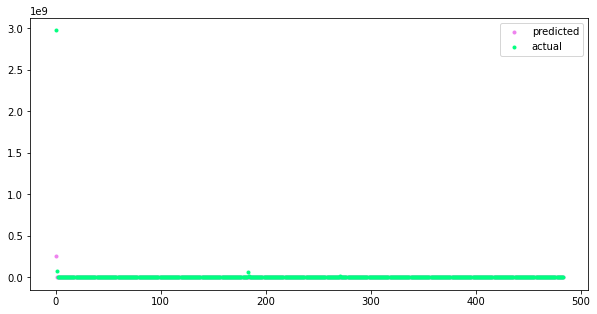

In [14]:
#loss에 테스트셋으로 실험 결과의 오차값을 저장한다.
y_vloss = history.history['val_loss']

y_actual = history.history['loss']


#x값을 지정하고 정확도는 파란색 / 오차는 빨간색 으로 표현.
x_len = np.arange(len(y_actual)) #x축 길이를 설정하기 위해 실시.
plt.figure(figsize=(10,5) )

plt.plot(x_len, y_vloss, "o", c="violet", markersize=3, label='predicted')
plt.plot(x_len, y_actual, "o", c="springgreen", markersize=3, label='actual')

plt.legend() #범례표기하도록 실시.
plt.show()
    
#모델 실행 및 저장
#model.fit(X, Y, validation_split=0.2, epochs=200, batch_size=200, verbose=0, callbacks=[checkpointer]) 